___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [19]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
import optuna
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate ,GridSearchCV

pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

1. Implement basic steps to see how is your data looks like

In [22]:
df.shape

(10000, 14)

In [23]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [9]:
df["Exited"].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.groupby(["Gender", "Geography"])["Exited"].value_counts(normalize=True)

Gender  Geography  Exited
Female  France     0        0.797
                   1        0.203
        Germany    0        0.624
                   1        0.376
        Spain      0        0.788
                   1        0.212
Male    France     0        0.873
                   1        0.127
        Germany    0        0.722
                   1        0.278
        Spain      0        0.869
                   1        0.131
Name: Exited, dtype: float64

2. Check for missing values

In [13]:
df.isnull().sum().any()

False

In [14]:
df.duplicated().sum()

0

3. Drop the features that not suitable for modelling

In [24]:
df = df.drop(['RowNumber', 'CustomerId' , 'Surname'], axis=1)

In [25]:
df.shape

(10000, 11)

4. Implement basic visualization steps such as histogram, countplot, heatmap

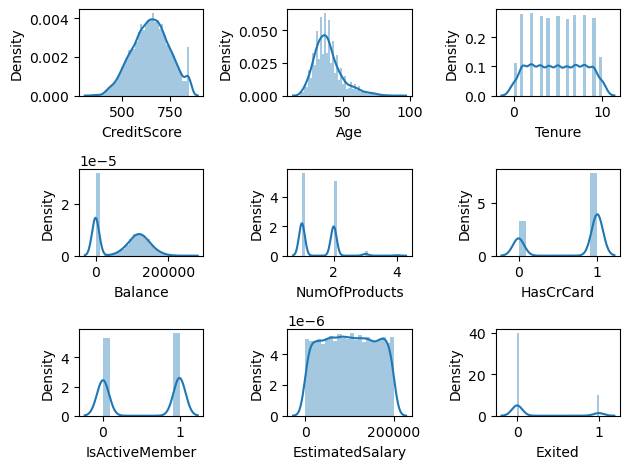

In [17]:
for i, column in enumerate(df.drop(['Geography', 'Gender'], axis=1) , 1):
    plt.subplot(3,3,i)
    sns.distplot(df[column])
    plt.tight_layout()

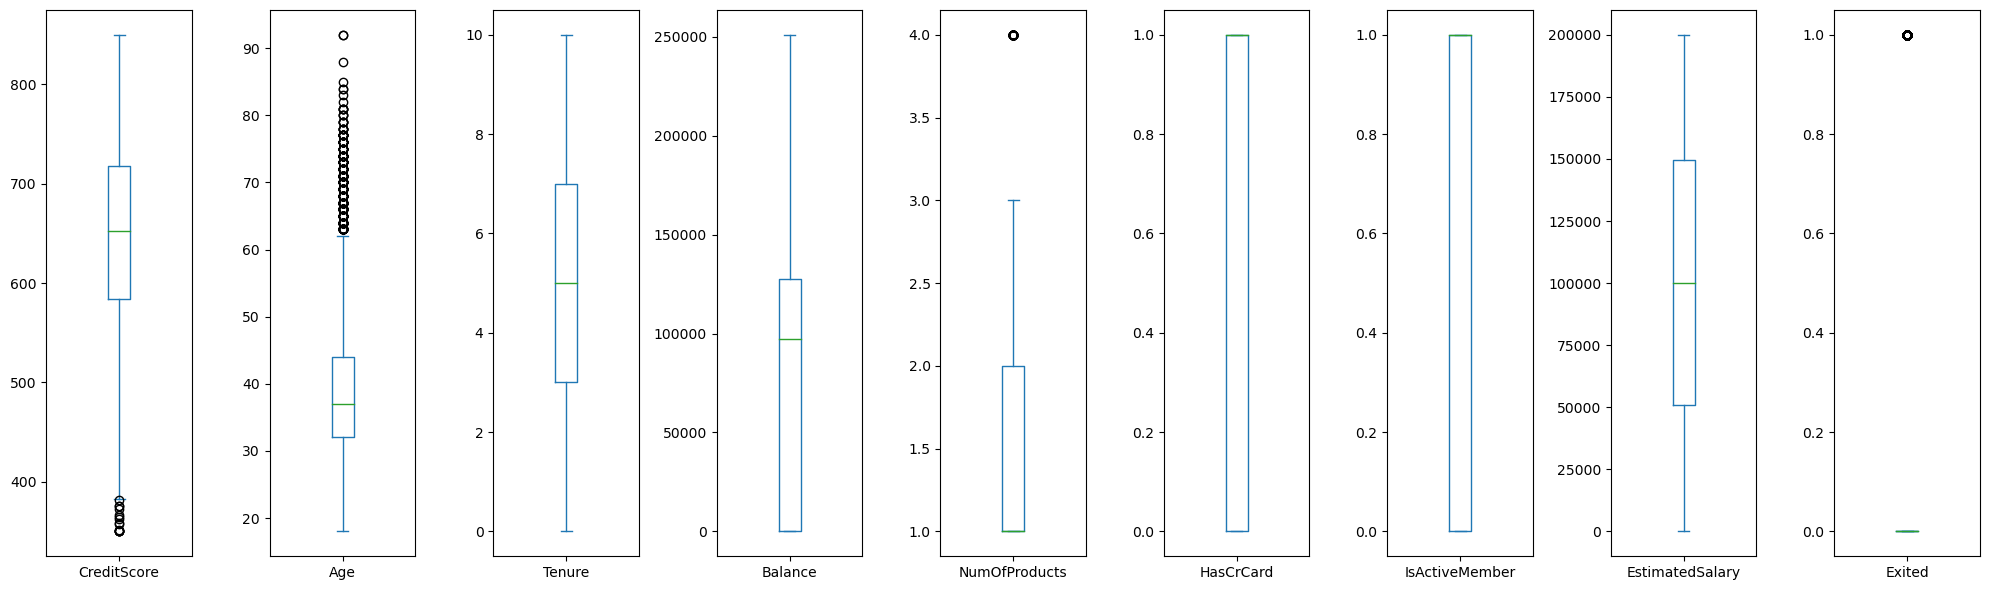

In [18]:
df.plot( kind="box", subplots=True, figsize=(20, 6))
plt.tight_layout();

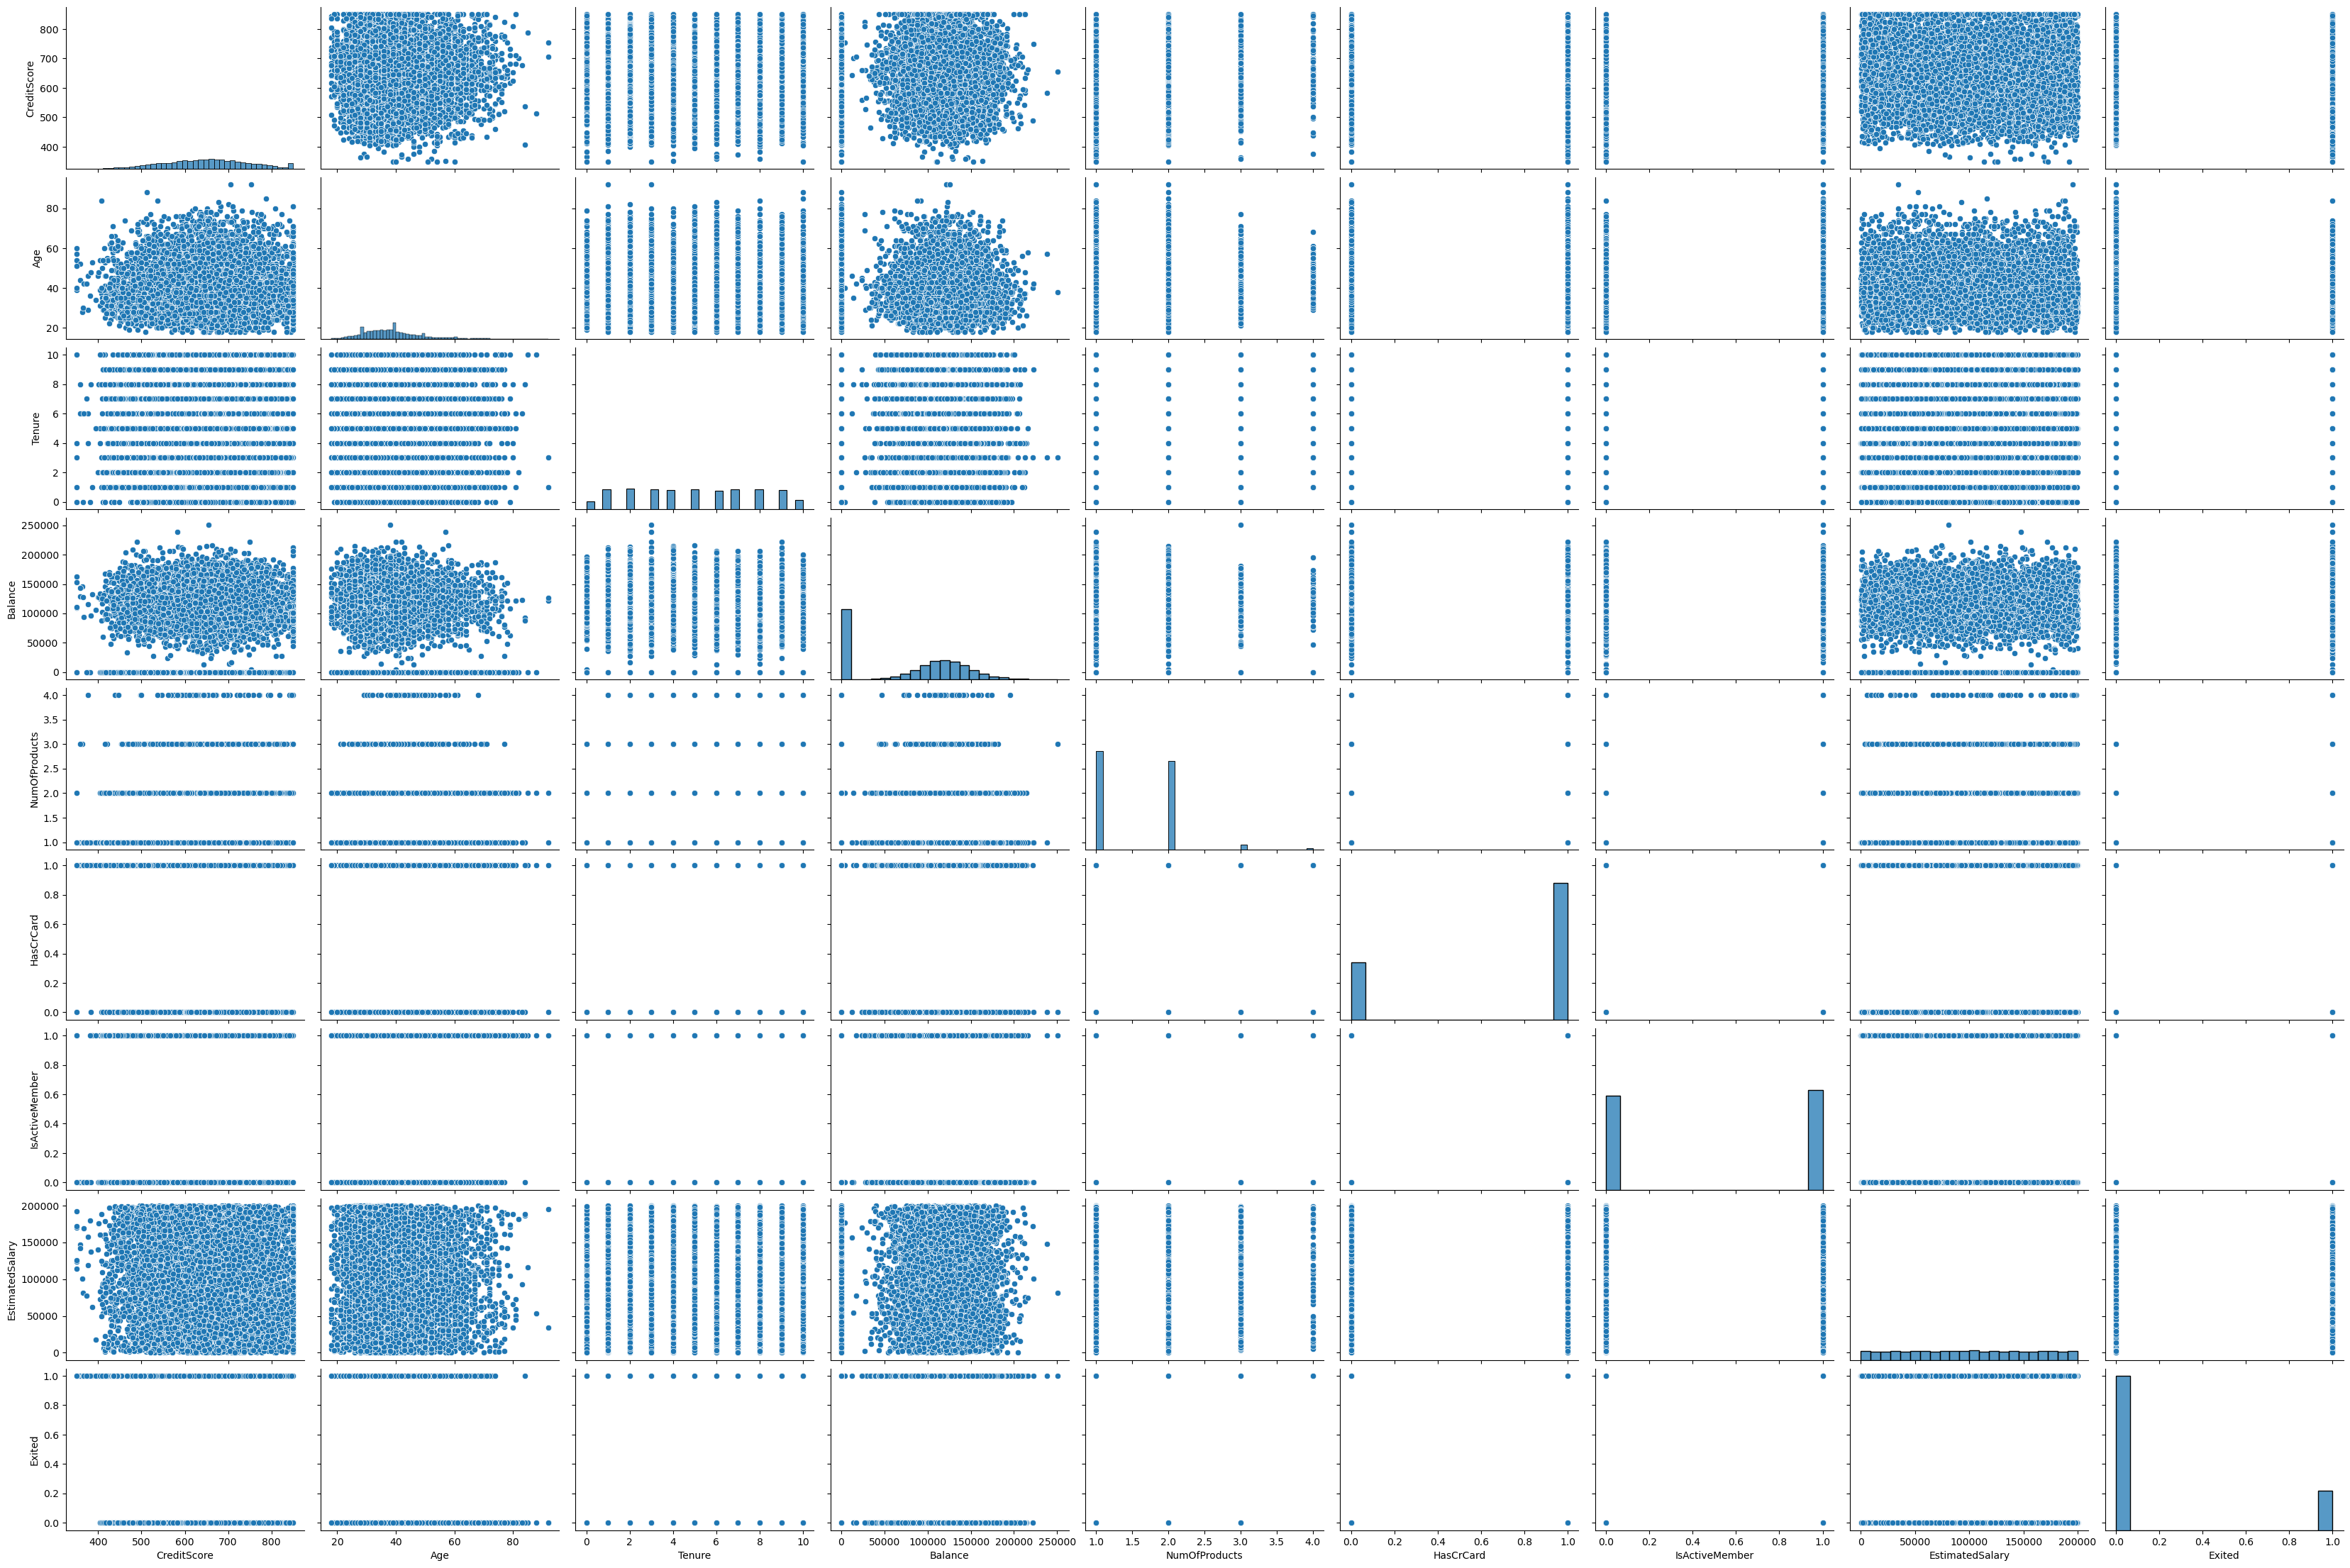

In [19]:
sns.pairplot(df.drop(['Geography' ,'Gender'], axis=1) , aspect=1.5);

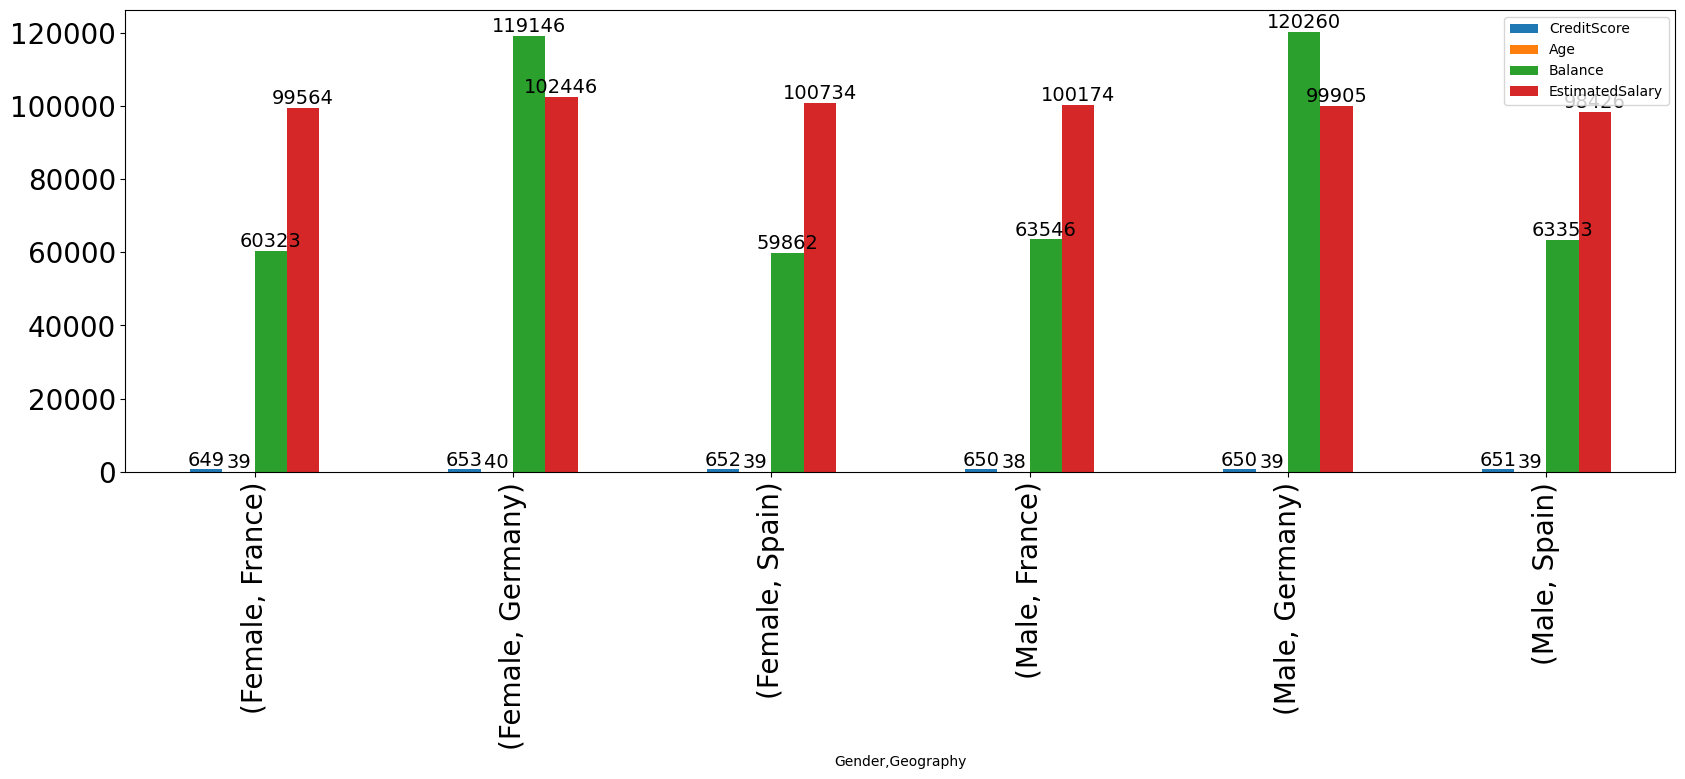

In [20]:
ax = df.drop(columns = ['Tenure' ,'NumOfProducts','HasCrCard','IsActiveMember','Exited']).groupby(["Gender", "Geography"]).mean().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

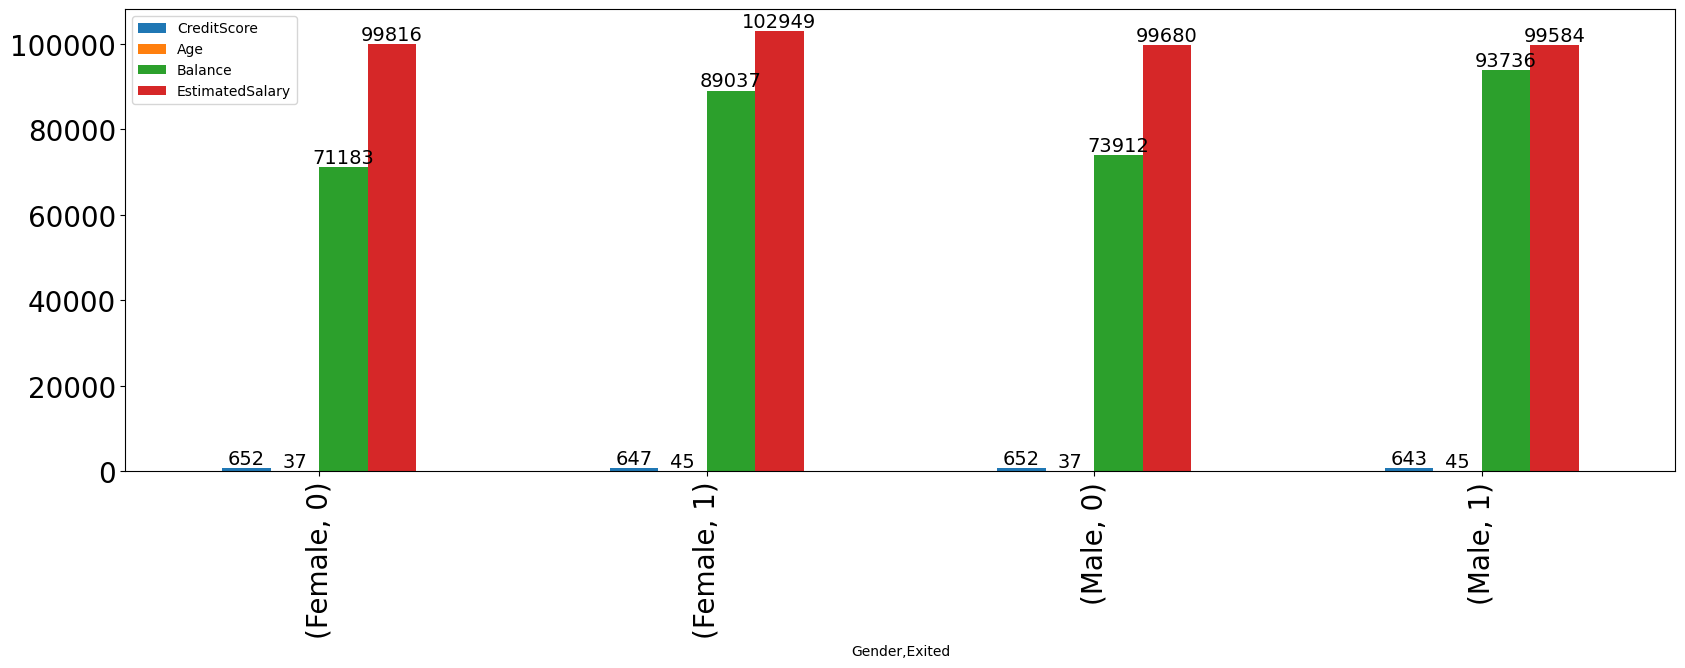

In [21]:
ax = df.drop(columns = ['Tenure' ,'NumOfProducts','HasCrCard','IsActiveMember']).groupby(["Gender", "Exited"]).mean().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

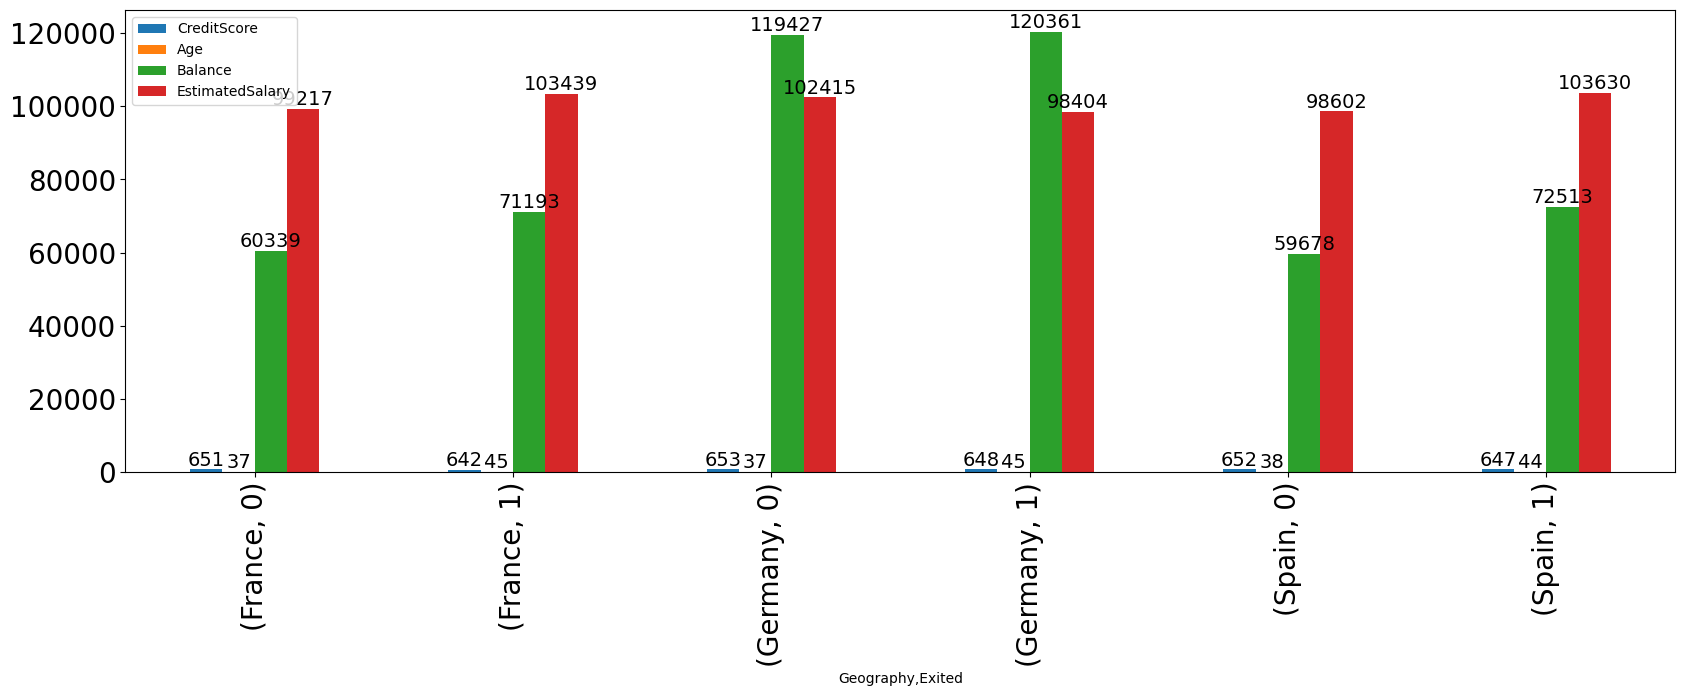

In [22]:
ax = df.drop(columns = ['Tenure' ,'NumOfProducts','HasCrCard','IsActiveMember']).groupby(["Geography", "Exited"]).mean().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

# Corrolation

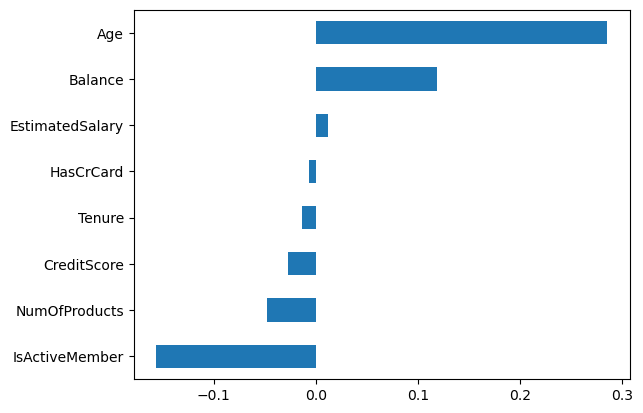

In [23]:
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
plt.show()

5. Convert categorical variables to dummy variables

In [26]:
df['Gender'].replace(['Male','Female'],[0,1],inplace=True)

In [27]:
df = pd.get_dummies(df, columns=['Geography'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [39]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=42)

In [41]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 12)
(9000,)
(1000, 12)
(1000,)


# Function for evaluation & visualizaion 

In [33]:
def plot_hist(model):
    loss_df = pd.DataFrame(model.history.history)
    loss_df.plot()
    plt.show()

In [34]:
def evl(model,X_test,y_test):
    y_pred = model.predict(X_test) > 0.5
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [35]:
#ROC (Receiver Operating Curve) and AUC (Area Under Curve)

def Curve(model,X_test,y_test):
    y_pred_proba = model.predict(X_test)
    RocCurveDisplay.from_predictions(y_test, y_pred_proba)
    print( "ROC Score: ",roc_auc_score(y_test, y_pred_proba))

In [36]:
def Curve1(model,X_train,y_train,X_test,y_test):
    y_trian_proba = model.predict(X_train)
    y_pred_proba = model.predict(X_test)
    
    fprt , tprt, _  = roc_curve(y_train ,y_trian_proba)
    vanillaT = auc(fprt,tprt)
    fprx , tprx, _  = roc_curve(y_test ,y_pred_proba)
    vanillaX = auc(fprx,tprx)
    
    plt.plot(fprt,tprt,lw=2, label = f'Train ROC ( area ={vanillaT:.2f})')
    plt.plot(fprx,tprx,lw=2, label = f'Test ROC ( area ={vanillaX:.2f})')
    plt.plot([0,1],[0,1],lw=2)
    plt.xlabel("FP")
    plt.ylabel("TP")
    plt.legend(loc = "lower right")
    plt.show()
    
    

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [43]:
seed = 42

In [33]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 18)                594       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
120/120 [==============================] - 2s 6ms/step - loss: 0.5215 - recall: 0.0071 - val_loss: 0.4685 - val_recall: 0.0000e+00
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4625 - recall: 0.0000e+00 - val_loss: 0.4478 - val_recall: 0.0000e+00
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4491 - recall: 0.0167 - val_loss: 0.4310 - val_recall: 0.0949
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4382 - recall: 0.1065 - val_loss: 0.4182 - val_recall: 0.1204
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4276 - recall: 0.1552 - val_loss: 0.4097 - val_recall: 0.2591
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4199 - recall: 0.2091 - val_loss: 0.3974 - val_recall: 0.2847
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4113 - recall: 0.2559 - val_loss: 0.3906 - val_recall: 0.3577
Epoch 8/100
120

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

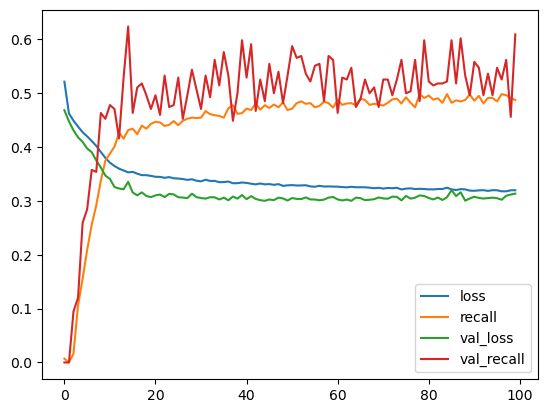

In [36]:
plot_hist(model)

In [37]:
evl(model,X_test,y_test)

32/32 [==============================] - 0s 2ms/step
[[741  55]
 [ 90 114]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       796
           1       0.67      0.56      0.61       204

    accuracy                           0.85      1000
   macro avg       0.78      0.74      0.76      1000
weighted avg       0.85      0.85      0.85      1000



32/32 [==============================] - 0s 2ms/step


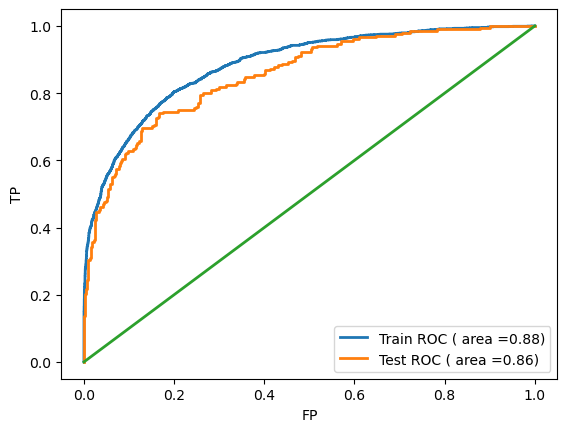

In [38]:
Curve1(model,X_train,y_train,X_test,y_test)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [39]:
tf.random.set_seed(seed)
'''
for Imbalance data
w0=n_samples/(n_classes*n_sample0),0.63
w1=n_samples/(n_classes*n_sample1),2.54
But after several attempts, I found this weight more suitable[0:0.6, 1:2] 
'''
weights = {0:0.6, 1:2}
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])



In [40]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=64, epochs=100, class_weight=weights, verbose=1)

Epoch 1/100
120/120 [==============================] - 2s 6ms/step - loss: 0.5836 - recall: 0.5799 - val_loss: 0.5918 - val_recall: 0.5438
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5452 - recall: 0.5754 - val_loss: 0.5268 - val_recall: 0.5109
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5194 - recall: 0.6042 - val_loss: 0.5614 - val_recall: 0.7518
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4963 - recall: 0.6523 - val_loss: 0.5222 - val_recall: 0.7774
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4760 - recall: 0.6703 - val_loss: 0.5118 - val_recall: 0.7956
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4593 - recall: 0.6889 - val_loss: 0.4614 - val_recall: 0.7664
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4445 - recall: 0.6921 - val_loss: 0.4625 - val_recall: 0.7993
Epoch 8/100
120/120 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

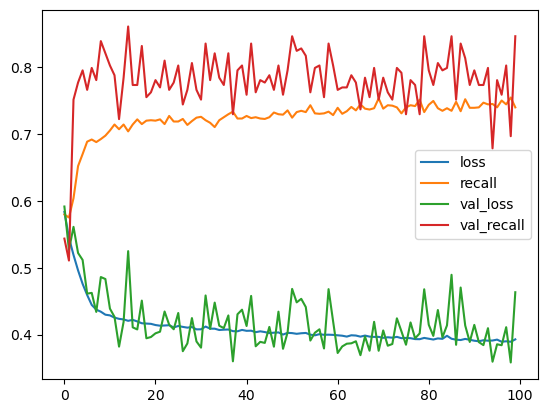

In [41]:
plot_hist(model)

In [42]:
evl(model,X_test,y_test)

32/32 [==============================] - 0s 2ms/step
[[588 208]
 [ 40 164]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       796
           1       0.44      0.80      0.57       204

    accuracy                           0.75      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.84      0.75      0.77      1000



32/32 [==============================] - 0s 2ms/step


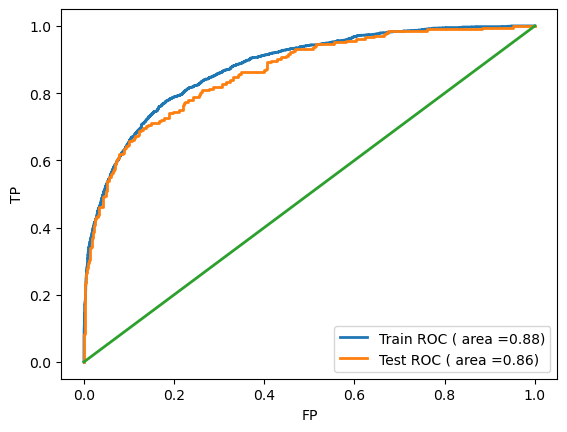

In [43]:
Curve1(model,X_train,y_train,X_test,y_test)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

- I see The higher the value of learning_rate, the worse the results become in general, but at some values ​​they are good

In [93]:
tf.random.set_seed(seed)
weights = {0:0.6, 1:2}
opt = Adam(learning_rate=0.01)

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [94]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=64, epochs=100, class_weight=weights, verbose=1)

Epoch 1/100
120/120 [==============================] - 2s 6ms/step - loss: 0.5934 - recall: 0.4105 - val_loss: 0.5989 - val_recall: 0.5365
Epoch 2/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5594 - recall: 0.5645 - val_loss: 0.5471 - val_recall: 0.5474
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5391 - recall: 0.5863 - val_loss: 0.5550 - val_recall: 0.6496
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5224 - recall: 0.6222 - val_loss: 0.5072 - val_recall: 0.5876
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5088 - recall: 0.6325 - val_loss: 0.5494 - val_recall: 0.7117
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4992 - recall: 0.6389 - val_loss: 0.5047 - val_recall: 0.6752
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4870 - recall: 0.6562 - val_loss: 0.5102 - val_recall: 0.7737
Epoch 8/100
120/120 [======

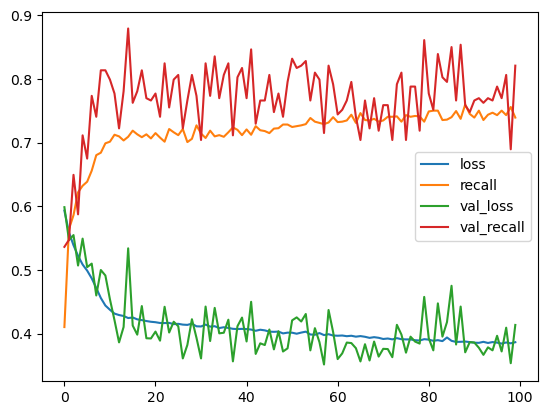

In [95]:
plot_hist(model)

In [96]:
evl(model,X_test,y_test)

32/32 [==============================] - 0s 2ms/step
[[613 183]
 [ 41 163]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       796
           1       0.47      0.80      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.78      0.72      1000
weighted avg       0.84      0.78      0.79      1000



32/32 [==============================] - 0s 2ms/step


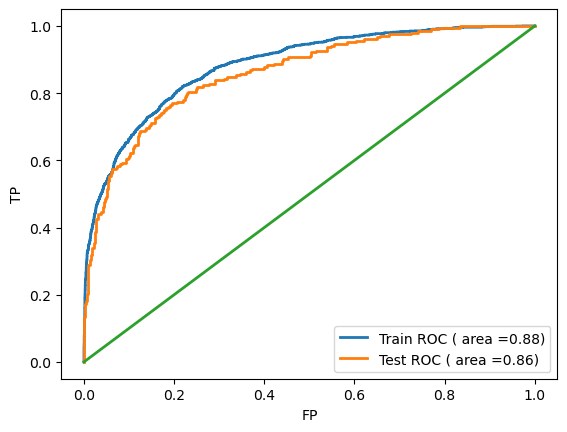

In [97]:
Curve1(model,X_train,y_train,X_test,y_test)

### Add Dropout Layer

In [78]:
tf.random.set_seed(seed)

weights = {0:0.6, 1:2}
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(18, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])


In [79]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=64, epochs=100, class_weight=weights, verbose=1)

Epoch 1/100
120/120 [==============================] - 2s 7ms/step - loss: 0.6074 - recall: 0.3951 - val_loss: 0.6515 - val_recall: 0.5803
Epoch 2/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5877 - recall: 0.3932 - val_loss: 0.6184 - val_recall: 0.6131
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5796 - recall: 0.4176 - val_loss: 0.6082 - val_recall: 0.6642
Epoch 4/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5696 - recall: 0.5099 - val_loss: 0.5557 - val_recall: 0.5657
Epoch 5/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5608 - recall: 0.5350 - val_loss: 0.5795 - val_recall: 0.6642
Epoch 6/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5573 - recall: 0.5593 - val_loss: 0.5524 - val_recall: 0.5876
Epoch 7/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5499 - recall: 0.5728 - val_loss: 0.5615 - val_recall: 0.6861
Epoch 8/100
120/120 [======

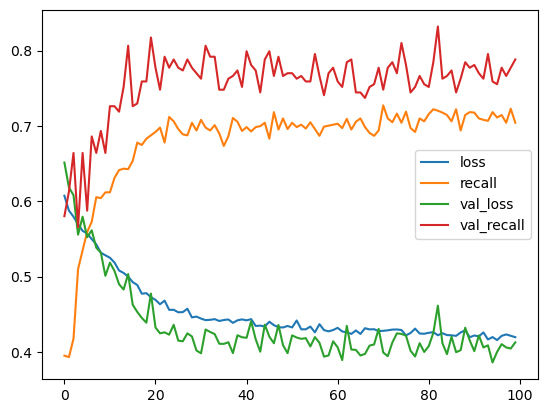

In [80]:
plot_hist(model)

In [81]:
evl(model,X_test,y_test)

32/32 [==============================] - 0s 2ms/step
[[646 150]
 [ 51 153]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       796
           1       0.50      0.75      0.60       204

    accuracy                           0.80      1000
   macro avg       0.72      0.78      0.73      1000
weighted avg       0.84      0.80      0.81      1000



32/32 [==============================] - 0s 2ms/step


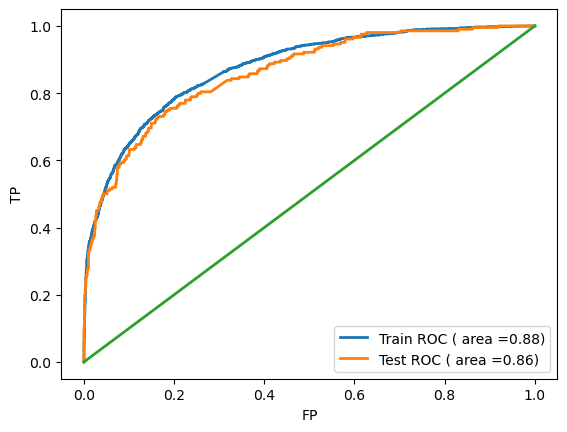

In [82]:
Curve1(model,X_train,y_train,X_test,y_test)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [54]:
tf.random.set_seed(seed)
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True)

weights = {0:0.6, 1:2}
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])



In [55]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=64, epochs=1000, class_weight=weights, 
          verbose=1,callbacks=[early_stop])

Epoch 1/1000
120/120 [==============================] - 2s 6ms/step - loss: 0.5785 - recall: 0.5927 - val_loss: 0.5789 - val_recall: 0.5693
Epoch 2/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5429 - recall: 0.5837 - val_loss: 0.5230 - val_recall: 0.5328
Epoch 3/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5287 - recall: 0.6010 - val_loss: 0.5601 - val_recall: 0.6642
Epoch 4/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5179 - recall: 0.6350 - val_loss: 0.5229 - val_recall: 0.6387
Epoch 5/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5084 - recall: 0.6273 - val_loss: 0.5431 - val_recall: 0.7117
Epoch 6/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5002 - recall: 0.6427 - val_loss: 0.5201 - val_recall: 0.7080
Epoch 7/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.4920 - recall: 0.6440 - val_loss: 0.5084 - val_recall: 0.7190
Epoch 8/1000
120/120

Epoch 58: early stopping


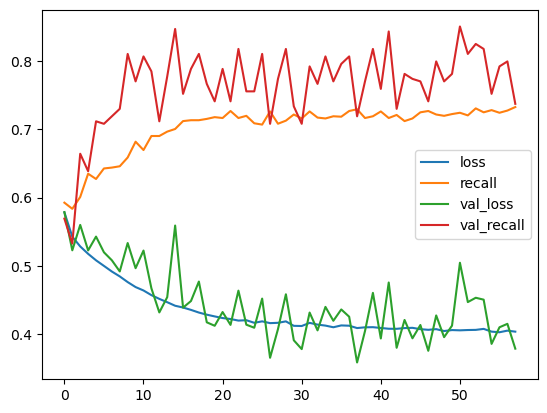

In [56]:
plot_hist(model)

In [57]:
evl(model,X_test,y_test)

32/32 [==============================] - 0s 2ms/step
[[692 104]
 [ 71 133]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       796
           1       0.56      0.65      0.60       204

    accuracy                           0.82      1000
   macro avg       0.73      0.76      0.75      1000
weighted avg       0.84      0.82      0.83      1000



32/32 [==============================] - 0s 2ms/step


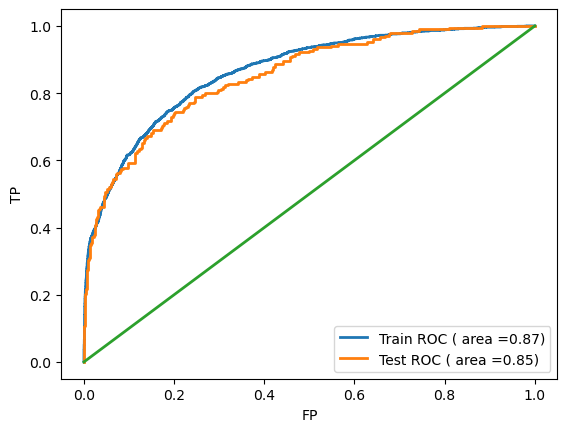

In [58]:
Curve1(model,X_train,y_train,X_test,y_test)

#### Monitor the "val_recall" as metric

In [59]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=20, restore_best_weights=True)

In [60]:

weights = {0:0.6, 1:2}
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])


In [61]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=64, epochs=1000, class_weight=weights,
          verbose=1,callbacks=[early_stop])

Epoch 1/1000
120/120 [==============================] - 2s 6ms/step - loss: 0.5835 - recall: 0.3380 - val_loss: 0.5959 - val_recall: 0.5693
Epoch 2/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5505 - recall: 0.5651 - val_loss: 0.5376 - val_recall: 0.5328
Epoch 3/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5322 - recall: 0.5965 - val_loss: 0.5574 - val_recall: 0.6971
Epoch 4/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5134 - recall: 0.6479 - val_loss: 0.5047 - val_recall: 0.6679
Epoch 5/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.4948 - recall: 0.6613 - val_loss: 0.5410 - val_recall: 0.7810
Epoch 6/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.4775 - recall: 0.6774 - val_loss: 0.4869 - val_recall: 0.7664
Epoch 7/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.4597 - recall: 0.6953 - val_loss: 0.4715 - val_recall: 0.7883
Epoch 8/1000
120/120

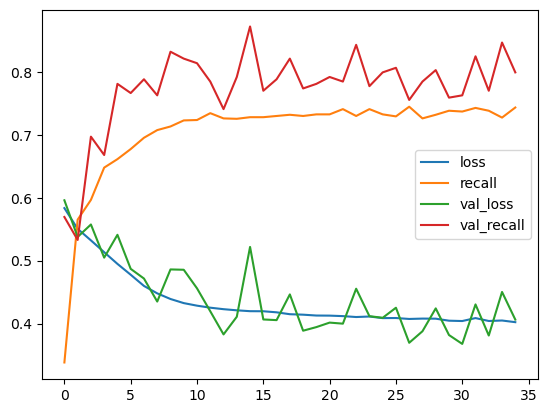

In [62]:
plot_hist(model)

In [63]:
evl(model,X_test,y_test)

32/32 [==============================] - 0s 2ms/step
[[538 258]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       796
           1       0.40      0.83      0.54       204

    accuracy                           0.71      1000
   macro avg       0.67      0.75      0.66      1000
weighted avg       0.83      0.71      0.73      1000



32/32 [==============================] - 0s 1ms/step


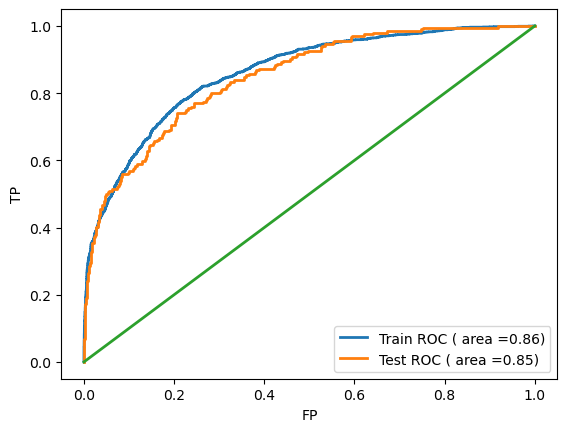

In [64]:
Curve1(model,X_train,y_train,X_test,y_test)

## Optuna

In [46]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True)


def create_model(trial):
    
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 64)
    n_units3 = trial.suggest_int("n_units3", 8, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1.1e-1)

    tf.random.set_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1, activation="relu", input_dim=X_train.shape[1]))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=optimizer(learning_rate=learning_rate)
                  , loss="binary_crossentropy", metrics=["accuracy","Recall"])
    # I added recall and accuracy because there are some parameter make recall1.00 
    # Without considering the other metrics gets worse
    

    return model

def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 2)
    w1 = trial.suggest_loguniform("w1", 0.5, 2.5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=64,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0)
    
    score = model.evaluate(X_train, y_train, verbose=0)[1]
    return score

In [53]:
%%time
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2023-10-30 14:05:06,424] A new study created in memory with name: no-name-48234a6d-5a4b-4b3b-ba75-4f831c5347bf


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-10-30 14:05:11,802] Trial 0 finished with value: 0.6146666407585144 and parameters: {'n_units1': 55, 'n_units2': 54, 'n_units3': 9, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0002458990526539613, 'w0': 0.06589221212944177, 'w1': 0.6943202668028506}. Best is trial 0 with value: 0.6146666407585144.


Restoring model weights from the end of the best epoch: 32.
Epoch 52: early stopping


[I 2023-10-30 14:05:22,848] Trial 1 finished with value: 0.8741111159324646 and parameters: {'n_units1': 60, 'n_units2': 41, 'n_units3': 32, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0014637782463005266, 'w0': 0.5399257127402144, 'w1': 0.8238949385085643}. Best is trial 1 with value: 0.8741111159324646.


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-10-30 14:05:29,553] Trial 2 finished with value: 0.24977777898311615 and parameters: {'n_units1': 92, 'n_units2': 58, 'n_units3': 34, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.013833330493422795, 'w0': 0.08759433161856497, 'w1': 0.5893906772796339}. Best is trial 1 with value: 0.8741111159324646.
[I 2023-10-30 14:05:55,252] Trial 3 finished with value: 0.8031111359596252 and parameters: {'n_units1': 95, 'n_units2': 48, 'n_units3': 33, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.012177949308083628, 'w0': 1.3927424678301417, 'w1': 1.1952068248881158}. Best is trial 1 with value: 0.8741111159324646.


Restoring model weights from the end of the best epoch: 19.
Epoch 39: early stopping


[I 2023-10-30 14:06:06,330] Trial 4 finished with value: 0.8668888807296753 and parameters: {'n_units1': 75, 'n_units2': 53, 'n_units3': 12, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.005136566771960494, 'w0': 0.6839959737994077, 'w1': 0.7896598199891931}. Best is trial 1 with value: 0.8741111159324646.


Restoring model weights from the end of the best epoch: 37.
Epoch 57: early stopping


[I 2023-10-30 14:06:22,947] Trial 5 finished with value: 0.8610000014305115 and parameters: {'n_units1': 99, 'n_units2': 38, 'n_units3': 58, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.02208218019595407, 'w0': 0.9641114454371839, 'w1': 2.1489123321383263}. Best is trial 1 with value: 0.8741111159324646.


Restoring model weights from the end of the best epoch: 5.
Epoch 25: early stopping


[I 2023-10-30 14:06:31,734] Trial 6 finished with value: 0.33633333444595337 and parameters: {'n_units1': 86, 'n_units2': 49, 'n_units3': 42, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.007978080586348192, 'w0': 0.01588055182901192, 'w1': 0.8980490692400465}. Best is trial 1 with value: 0.8741111159324646.


Restoring model weights from the end of the best epoch: 25.
Epoch 45: early stopping


[I 2023-10-30 14:06:44,353] Trial 7 finished with value: 0.8206666707992554 and parameters: {'n_units1': 37, 'n_units2': 29, 'n_units3': 48, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.005266355263912081, 'w0': 0.2928593883121098, 'w1': 1.4960923579565368}. Best is trial 1 with value: 0.8741111159324646.


Restoring model weights from the end of the best epoch: 20.
Epoch 40: early stopping


[I 2023-10-30 14:06:56,531] Trial 8 finished with value: 0.8694444298744202 and parameters: {'n_units1': 111, 'n_units2': 40, 'n_units3': 17, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0014659276071360026, 'w0': 1.916363101160321, 'w1': 1.1606623538845806}. Best is trial 1 with value: 0.8741111159324646.


Restoring model weights from the end of the best epoch: 56.
Epoch 76: early stopping


[I 2023-10-30 14:07:18,646] Trial 9 finished with value: 0.5411111116409302 and parameters: {'n_units1': 40, 'n_units2': 61, 'n_units3': 50, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0013424391651468473, 'w0': 0.01754063534842364, 'w1': 0.8720826327286605}. Best is trial 1 with value: 0.8741111159324646.


Restoring model weights from the end of the best epoch: 51.
Epoch 71: early stopping


[I 2023-10-30 14:07:38,613] Trial 10 finished with value: 0.858222246170044 and parameters: {'n_units1': 9, 'n_units2': 10, 'n_units3': 24, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0537241569888818, 'w0': 0.30398958975701895, 'w1': 0.5762399328610007}. Best is trial 1 with value: 0.8741111159324646.


Restoring model weights from the end of the best epoch: 30.
Epoch 50: early stopping


[I 2023-10-30 14:07:52,227] Trial 11 finished with value: 0.8737778067588806 and parameters: {'n_units1': 122, 'n_units2': 32, 'n_units3': 22, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0011798896021963615, 'w0': 1.9086623608217514, 'w1': 1.1357056523375524}. Best is trial 1 with value: 0.8741111159324646.


Restoring model weights from the end of the best epoch: 43.
Epoch 63: early stopping


[I 2023-10-30 14:08:07,834] Trial 12 finished with value: 0.8755555748939514 and parameters: {'n_units1': 128, 'n_units2': 26, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0006086418853108704, 'w0': 0.6786685855984164, 'w1': 0.5014378189936911}. Best is trial 12 with value: 0.8755555748939514.
[I 2023-10-30 14:08:30,604] Trial 13 finished with value: 0.8725555539131165 and parameters: {'n_units1': 66, 'n_units2': 21, 'n_units3': 28, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.00035745280770524727, 'w0': 0.5470397452046356, 'w1': 0.5081585197974802}. Best is trial 12 with value: 0.8755555748939514.
[I 2023-10-30 14:08:53,979] Trial 14 finished with value: 0.8505555391311646 and parameters: {'n_units1': 50, 'n_units2': 21, 'n_units3': 38, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.00013107567768441645, 'w0': 0.4138558678707138, 'w1': 0.6639813649778487}. Best is trial 12 with value: 0.8755555748

Restoring model weights from the end of the best epoch: 31.
Epoch 51: early stopping


[I 2023-10-30 14:09:07,334] Trial 15 finished with value: 0.8374444246292114 and parameters: {'n_units1': 25, 'n_units2': 22, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0005521530592304708, 'w0': 0.20451093588018837, 'w1': 0.6959359505461418}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 17.
Epoch 37: early stopping


[I 2023-10-30 14:09:19,305] Trial 16 finished with value: 0.8707777857780457 and parameters: {'n_units1': 125, 'n_units2': 43, 'n_units3': 46, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0021603788178093685, 'w0': 0.7342806302407555, 'w1': 0.5058558336406479}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 61.
Epoch 81: early stopping


[I 2023-10-30 14:09:43,611] Trial 17 finished with value: 0.8703333139419556 and parameters: {'n_units1': 71, 'n_units2': 11, 'n_units3': 63, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0006641691567244531, 'w0': 0.9701584106779213, 'w1': 0.9552618610855744}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 14.
Epoch 34: early stopping


[I 2023-10-30 14:09:52,965] Trial 18 finished with value: 0.8647778034210205 and parameters: {'n_units1': 60, 'n_units2': 29, 'n_units3': 17, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0028285470218183976, 'w0': 0.43984981348578595, 'w1': 0.7786487225645388}. Best is trial 12 with value: 0.8755555748939514.
[I 2023-10-30 14:10:17,273] Trial 19 finished with value: 0.20411111414432526 and parameters: {'n_units1': 107, 'n_units2': 16, 'n_units3': 30, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00010580581206359365, 'w0': 0.1613877390097074, 'w1': 0.6038905343977049}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 42.
Epoch 62: early stopping


[I 2023-10-30 14:10:34,202] Trial 20 finished with value: 0.8754444718360901 and parameters: {'n_units1': 82, 'n_units2': 30, 'n_units3': 39, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0006576456060021988, 'w0': 0.910106445704732, 'w1': 0.5101022204201855}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 43.
Epoch 63: early stopping


[I 2023-10-30 14:10:52,832] Trial 21 finished with value: 0.8730000257492065 and parameters: {'n_units1': 80, 'n_units2': 33, 'n_units3': 38, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0005964917012893325, 'w0': 1.0049140488425117, 'w1': 0.5054809161218401}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 21.
Epoch 41: early stopping


[I 2023-10-30 14:11:06,527] Trial 22 finished with value: 0.8694444298744202 and parameters: {'n_units1': 111, 'n_units2': 27, 'n_units3': 42, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0008567296333280118, 'w0': 0.5116224711031303, 'w1': 0.6107432706745556}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 33.
Epoch 53: early stopping


[I 2023-10-30 14:11:22,688] Trial 23 finished with value: 0.8697777986526489 and parameters: {'n_units1': 47, 'n_units2': 44, 'n_units3': 19, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.002265243752127135, 'w0': 1.3442800290297299, 'w1': 0.7338167328612848}. Best is trial 12 with value: 0.8755555748939514.
[I 2023-10-30 14:11:49,879] Trial 24 finished with value: 0.8683333396911621 and parameters: {'n_units1': 24, 'n_units2': 36, 'n_units3': 31, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.00034026630788764977, 'w0': 0.7172407410708794, 'w1': 0.573774179299165}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 25.
Epoch 45: early stopping


[I 2023-10-30 14:12:02,971] Trial 25 finished with value: 0.863444447517395 and parameters: {'n_units1': 65, 'n_units2': 24, 'n_units3': 54, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.001061386278113955, 'w0': 0.3460300963791157, 'w1': 0.6627391181434377}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 32.
Epoch 52: early stopping


[I 2023-10-30 14:12:18,484] Trial 26 finished with value: 0.8629999756813049 and parameters: {'n_units1': 84, 'n_units2': 34, 'n_units3': 42, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0002666715044062573, 'w0': 0.24503651205675533, 'w1': 0.5069027752708831}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 21.
Epoch 41: early stopping


[I 2023-10-30 14:12:30,999] Trial 27 finished with value: 0.8709999918937683 and parameters: {'n_units1': 101, 'n_units2': 40, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0016798999596489132, 'w0': 0.5853072054392192, 'w1': 0.7787789987080773}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 37.
Epoch 57: early stopping


[I 2023-10-30 14:12:48,196] Trial 28 finished with value: 0.8723333477973938 and parameters: {'n_units1': 118, 'n_units2': 17, 'n_units3': 21, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0008905485044239741, 'w0': 0.4241861603143229, 'w1': 0.6309567436457707}. Best is trial 12 with value: 0.8755555748939514.


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-10-30 14:12:54,374] Trial 29 finished with value: 0.7776666879653931 and parameters: {'n_units1': 60, 'n_units2': 17, 'n_units3': 10, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00018100634691084455, 'w0': 0.14419246721098547, 'w1': 0.6832753873205987}. Best is trial 12 with value: 0.8755555748939514.


CPU times: total: 1min 34s
Wall time: 7min 47s


In [54]:
study.best_params

{'n_units1': 128,
 'n_units2': 26,
 'n_units3': 26,
 'optimizer': keras.optimizers.adam.Adam,
 'learning_rate': 0.0006086418853108704,
 'w0': 0.6786685855984164,
 'w1': 0.5014378189936911}

In [55]:
unit1, unit2, unit3,optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"])

tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(unit1, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=optimizer(learning_rate=lr)
              ,loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=64,
    callbacks=[early_stop],
    epochs=1000,
    class_weight={0: w0, 1: w1},
    
    verbose=1)

Epoch 1/1000
120/120 [==============================] - 1s 3ms/step - loss: 0.2815 - recall: 0.0000e+00 - val_loss: 0.4689 - val_recall: 0.0000e+00
Epoch 2/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2574 - recall: 0.0000e+00 - val_loss: 0.4521 - val_recall: 0.0000e+00
Epoch 3/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2481 - recall: 0.0135 - val_loss: 0.4215 - val_recall: 0.0985
Epoch 4/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2410 - recall: 0.0770 - val_loss: 0.4083 - val_recall: 0.1387
Epoch 5/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2331 - recall: 0.1289 - val_loss: 0.3861 - val_recall: 0.2664
Epoch 6/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2223 - recall: 0.1956 - val_loss: 0.3596 - val_recall: 0.2956
Epoch 7/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2107 - recall: 0.2809 - val_loss: 0.3395 - val_recall: 0.3978
Epoc

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

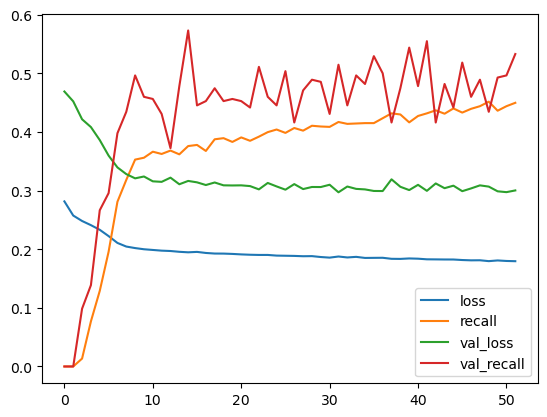

In [56]:
plot_hist(model)

In [57]:
evl(model,X_test,y_test)

32/32 [==============================] - 0s 1ms/step
[[768  28]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.76      0.43      0.55       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.85      0.85      0.84      1000



32/32 [==============================] - 0s 1ms/step


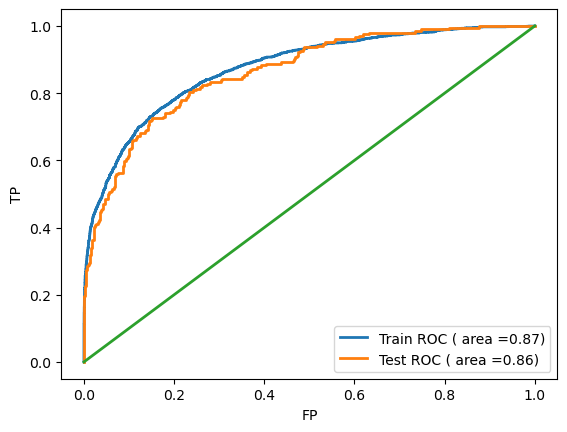

In [58]:
Curve1(model,X_train,y_train,X_test,y_test)

# Final Model and Model Deployment

In [128]:
weights = {0:0.6, 1:2}
opt = Adam(learning_rate=0.01)

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [129]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=64, epochs=100, class_weight=weights, verbose=1)

Epoch 1/100
120/120 [==============================] - 2s 6ms/step - loss: 0.5743 - recall: 0.5042 - val_loss: 0.5911 - val_recall: 0.6496
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5446 - recall: 0.6087 - val_loss: 0.5291 - val_recall: 0.5693
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5264 - recall: 0.6145 - val_loss: 0.5550 - val_recall: 0.7153
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5100 - recall: 0.6459 - val_loss: 0.5271 - val_recall: 0.6898
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4996 - recall: 0.6472 - val_loss: 0.5391 - val_recall: 0.7445
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4881 - recall: 0.6562 - val_loss: 0.4963 - val_recall: 0.7153
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4762 - recall: 0.6690 - val_loss: 0.4886 - val_recall: 0.7518
Epoch 8/100
120/120 [======

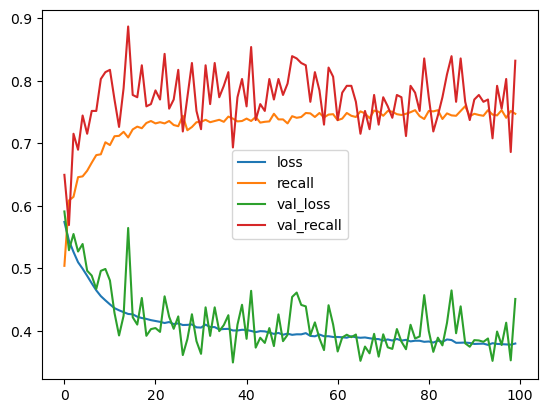

In [130]:
plot_hist(model)

In [131]:
evl(model,X_test,y_test)

32/32 [==============================] - 0s 2ms/step
[[600 196]
 [ 39 165]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       796
           1       0.46      0.81      0.58       204

    accuracy                           0.77      1000
   macro avg       0.70      0.78      0.71      1000
weighted avg       0.84      0.77      0.78      1000



32/32 [==============================] - 0s 2ms/step


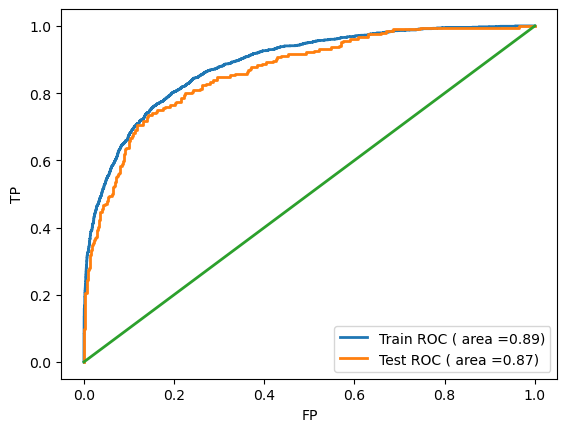

In [132]:
Curve1(model,X_train,y_train,X_test,y_test)

In [150]:
import pickle

pickle.dump(scaler, open("scaler_coustmer", "wb"))

In [151]:
model.save("model_coustmer.h5")

## Loading Model and Scaler

In [152]:
from tensorflow.keras.models import load_model

In [153]:
model_coustmer= load_model("model_coustmer.h5")
scaler_coustmer = pickle.load(open("scaler_coustmer", "rb"))

## Prediction

In [156]:
from keras import Sequential
from keras.models import load_model

In [157]:
single_patient = df.drop("Exited", axis=1).iloc[0:1, :]
single_patient

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.000,1,1,1,101348.880,1,0,0


In [159]:
single_patient = scaler_coustmer.transform(single_patient)
single_patient

array([[0.538     , 1.        , 0.32432432, 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.50673489, 1.        ,
        0.        , 0.        ]])

In [160]:
(model.predict(single_patient) > 0.5).astype("int32")

1/1 [==============================] - 0s 44ms/step


array([[1]])

In [161]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___